In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns


In [23]:
users = pd.read_csv('user_spend_time.csv')

# find the null rows, print them
print(users[users.isnull().any(axis=1)])


Empty DataFrame
Columns: [user_guid, first_name, last_name, total_spend, time_on_site]
Index: []


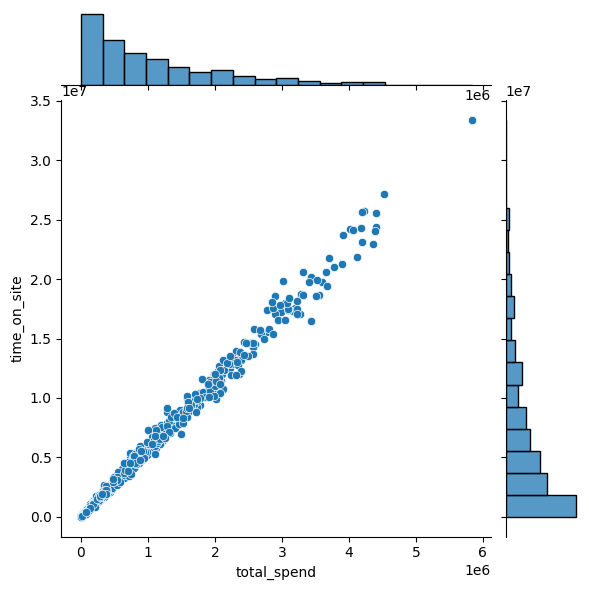

In [24]:
# graph the correlation between the two variables`total_spend_time` and `time_on_site
sns.jointplot(x='total_spend', y='time_on_site',data=users)

This looks fairly compelling; there is a clear correlation between time on site and the amount a user spends. Let's see if we can build a model to predict the amount a user will spend based on the time they spend on the site.

In [25]:
# build a model to predict the total spend time based on the time on site
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = users['time_on_site'].values.reshape(-1,1)
Y = users['total_spend'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

# are there any NaN values in the dataset?
users.isnull().sum()


user_guid       0
first_name      0
last_name       0
total_spend     0
time_on_site    0
dtype: int64

In [36]:
lm = LinearRegression() # Creating an Instance of LinearRegression model

lm.fit(X_train,Y_train) # Train/fit on the trainingdata, this will give-

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
print(lm.coef_)

[[0.17512577]]


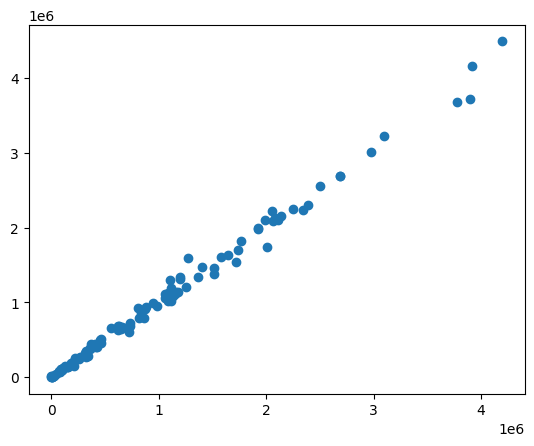

In [29]:
prediction = lm.predict(X_test)
py.scatter(Y_test,prediction)

In [31]:
print('MAE= ', metrics.mean_absolute_error(Y_test,prediction) )
print('MSE= ', metrics.mean_squared_error(Y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE=  50161.80576118671
MSE=  6387468385.67851
RMSE: 79921.63903273325


<Axes: ylabel='Count'>

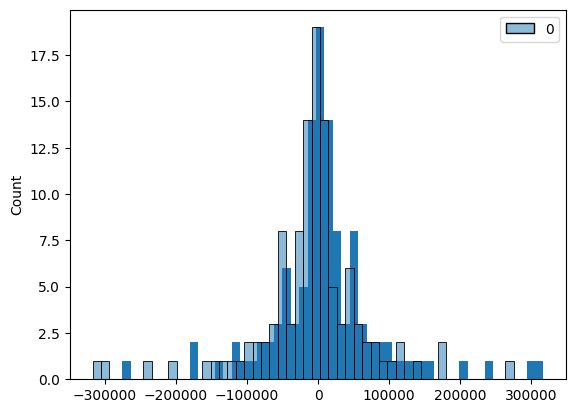

In [34]:
py.hist(prediction-Y_test,bins=50)
# plot as histogram
sns.histplot((Y_test-prediction),bins=50)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'